# Autocorrelation: Exploring Rossmann Drug Store Sales Data

In [1]:
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('data/rossmann.csv', skipinitialspace=True, low_memory=False)

In [2]:
# we are most interested in `Date` column that contains date of sales per store; 
#convert to `DateTime` and set as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace = True)

In [3]:
data['Year'] = data.index.year
data['Month'] = data.index.month

In [4]:
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7
2015-07-31,2,5,6064,625,1,1,0,1,2015,7
2015-07-31,3,5,8314,821,1,1,0,1,2015,7
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7
2015-07-31,5,5,4822,559,1,1,0,1,2015,7


In [26]:
data.describe( include ='all').round(3)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
count,1017209.000,1017209.000,1017209.000,1017209.000,1017209.000,1017209.000,1017209,1017209.000,1017209.000,1017209.000
unique,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,986159,NaN,NaN,NaN
mean,558.430,3.998,5773.819,633.146,0.830,0.382,NaN,0.179,2013.832,5.847
std,321.909,1.997,3849.926,464.412,0.376,0.486,NaN,0.383,8.682,3.321
min,1.000,1.000,0.000,0.000,0.000,0.000,NaN,0.000,2013.000,1.000
25%,280.000,2.000,3727.000,405.000,1.000,0.000,NaN,0.000,2013.000,3.000
50%,558.000,4.000,5744.000,609.000,1.000,0.000,NaN,0.000,2014.000,6.000
75%,838.000,6.000,7856.000,837.000,1.000,1.000,NaN,0.000,2014.000,8.000


In [6]:
# describe and EDA


In [9]:
# sort dates
data = data.sort_index()
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2013-01-01,1115,2,0,0,0,0,a,1,2013,1
2013-01-01,379,2,0,0,0,0,a,1,2013,1
2013-01-01,378,2,0,0,0,0,a,1,2013,1
2013-01-01,377,2,0,0,0,0,a,1,2013,1
2013-01-01,376,2,0,0,0,0,a,1,2013,1


In [23]:
df2 = pd.pivot_table(data, index = 'StateHoliday',  values = 'Sales')
df2

StateHoliday
0    5947.483893
a     290.735686
b     214.311510
c     168.733171
Name: Sales, dtype: float64

In [18]:
df = pd.pivot_table(data, index = 'DayOfWeek', values = 'Sales', columns= 'Promo')

In [19]:
df

Promo,0,1
DayOfWeek,,
1,5604.357608,9707.808423
2,5612.048396,8227.909603
3,5418.548638,7554.021384
4,5097.574306,7259.497280
5,6178.610459,7202.540577
6,5847.562599,NaN
7,204.183189,NaN


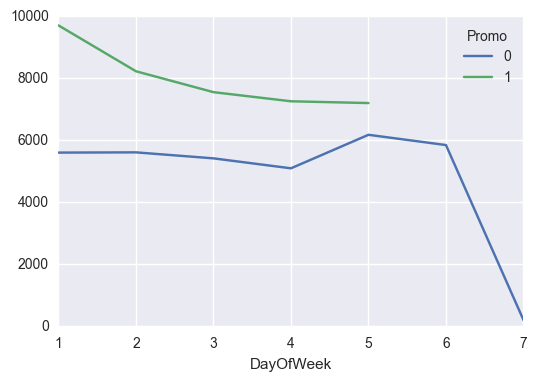

In [21]:
df.plot()

In [10]:
# df of store 1
Store1 = data[data.Store == 1]

In [12]:
Store1.head()


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2013-01-01,1,2,0,0,0,0,a,1,2013,1
2013-01-02,1,3,5530,668,1,0,0,1,2013,1
2013-01-03,1,4,4327,578,1,0,0,1,2013,1
2013-01-04,1,5,4486,619,1,0,0,1,2013,1
2013-01-05,1,6,4997,635,1,0,0,1,2013,1


To compare sales on holidays, we can compare the sales using box-plots, which allows us to compare the distribution of sales on holidays against all other days. On state holidays the store is closed (and as a nice sanity check there are 0 sales), and on school holidays the sales are relatively similar.

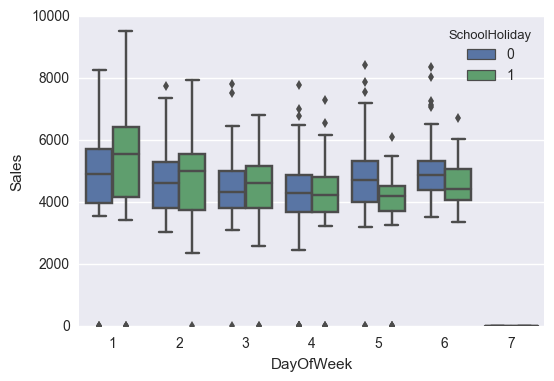

In [15]:
# do school holidays affect sales?
sns.boxplot(data = Store1, x= 'DayOfWeek', y = 'Sales', hue = 'SchoolHoliday')

In [ ]:
# does day of week affect sales?


Lastly, we want to identify larger-scale trends in our data. How did sales change from 2014 to 2015? Were there any particularly interesting outliers in terms of sales or customer visits?

In [ ]:
# plot store 1 sales when open


In [ ]:
# plot store 1 customer count when open


## Autocorrelation

To measure how much the sales are correlated with each other, we want to compute the _autocorrelation_ of the 'Sales' column. In pandas, we do this we with the `autocorr` function.

`autocorr` takes one argument, the `lag` - which is how many prior data points should be used to compute the correlation. If we set the `lag` to 1, we compute the correlation between every point and the point directly preceding it, while setting `lag` to 10, computes the correlation between every point and the point 10 days earlier.

In [30]:
# resample all store data to average daily sales
R = data[data.Open == 1].Sales.resample('D').mean()
R

Date
2013-01-01    5719.705882
2013-01-02    6255.471647
2013-01-03    5723.913436
2013-01-04    5991.835740
2013-01-05    5376.326107
2013-01-06    7573.894737
2013-01-07    9789.193490
2013-01-08    7918.042534
2013-01-09    7010.500452
2013-01-10    7014.918552
2013-01-11    7275.390045
2013-01-12    5445.693213
2013-01-13    8002.888889
2013-01-14    5327.409955
2013-01-15    4988.770136
2013-01-16    4790.063348
2013-01-17    4865.911472
2013-01-18    5548.833635
2013-01-19    5429.261066
2013-01-20    7978.947368
2013-01-21    7914.249322
2013-01-22    7516.069557
2013-01-23    6997.798555
2013-01-24    6714.653430
2013-01-25    7022.372744
2013-01-26    5278.673285
2013-01-27    7142.400000
2013-01-28    5310.480578
2013-01-29    4925.626016
2013-01-30    5333.735560
                 ...     
2015-07-02    7581.950628
2015-07-03    7657.439856
2015-07-04    5434.718133
2015-07-05    8159.030303
2015-07-06    6768.826750
2015-07-07    5738.800718
2015-07-08    6207.921903
2015-07

In [31]:
#correlation of sales to the day before 
R.autocorr()

0.428770537844679

In [33]:
# check autocorrelation for previous two weeks/month

for i in range(1,30):
    print i, R.autocorr(lag=i)

1 0.428770537845
2 0.260079778181
3 0.183547048998
4 0.0650732802345
5 -0.113821706823
6 -0.149396085164
7 0.151625390858
8 -0.171496255244
9 -0.16636050113
10 -0.048182591706
11 0.0217862585866
12 0.0743102426534
13 0.181494355883
14 0.580928689688
15 0.177484083238
16 0.0835079331106
17 0.0601753836174
18 0.0125316272523
19 -0.10043679733
20 -0.0937223635708
21 0.191777694191
22 -0.0929163225036
23 -0.121159719632
24 -0.0511655721122
25 -0.000929934944821
26 0.0278429316362
27 0.129146823499
28 0.481019569539
29 0.15605558655


(0, 35)

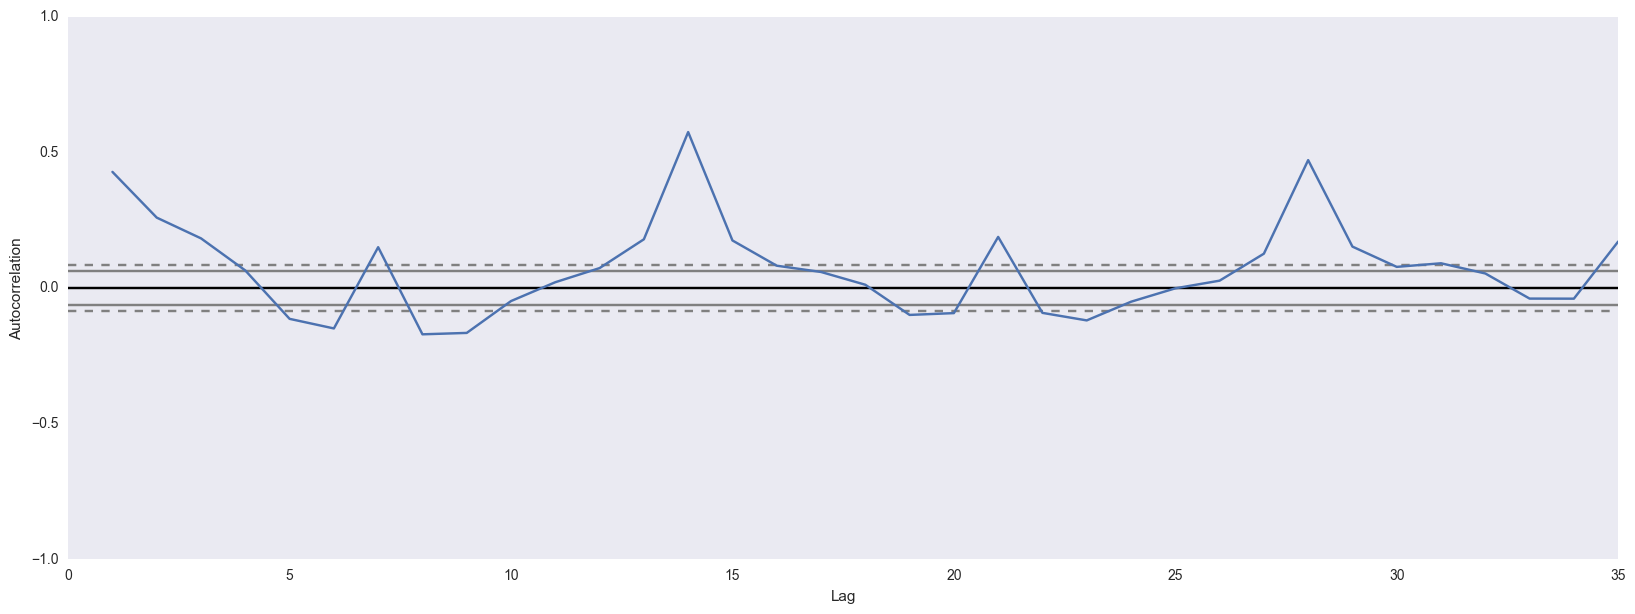

In [35]:
# plot autocorrelation for different lags using pandas
from pandas.tools.plotting import autocorrelation_plot

plt.figure(figsize = (20,7))
autocorrelation_plot(R)
plt.xlim(0,35)


In [36]:
R.autocorr(lag=365)

0.25701339164210496

In [37]:
for i in range(360,371):
    print i, R.autocorr(lag=i)

360 -0.0169503922861
361 0.0867236856759
362 0.110282920259
363 0.229177202838
364 0.657496007125
365 0.257013391642
366 0.139001069703
367 0.113729665938
368 0.0711500764414
369 -0.0654537057063
370 -0.0436667390173


## Rolling Averages

If we want to investigate trends over time in sales, as always, we will start by computing simple aggregates.  We want to know what the mean and median sales were for each month and year.

In Pandas, this is performed using the `resample` command, which is very similar to the `groupby` command. It allows us to group over different time intervals.

We can use `data.resample` and provide as arguments:
    - The level on which to roll-up to, 'D' for day, 'W' for week, 'M' for month, 'A' for year
    - What aggregation to perform: 'mean', 'median', 'sum', etc.

In [38]:
# resample original sales data mean and median by month
data2 = data[data['Open']==1]

R2 = data2.Sales.resample('M').mean()
R3 = data2.Sales.resample('M').median()


While identifying the monthly averages are useful, we often want to compare the sales data of a date to a smaller window. To understand holidays sales, we don't want to compare late December with the entire month, but perhaps a few days surrounding it. We can do this using rolling averages.

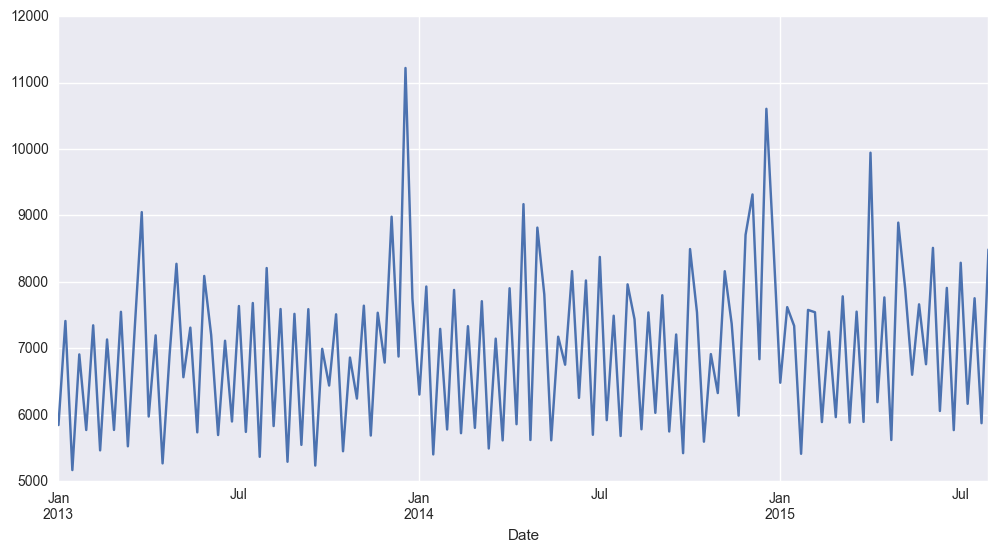

In [48]:
# resample to have the daily average over all stores, then find rolling mean
dss = data2.Sales.resample('W').mean()

plt.figure(figsize=(12,6))
dss.plot()

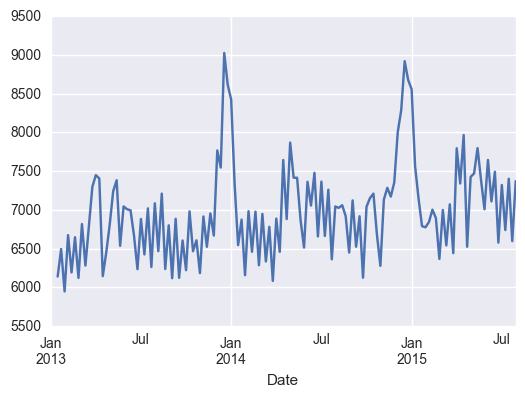

In [42]:
dss.rolling(window = 3).mean().plot()



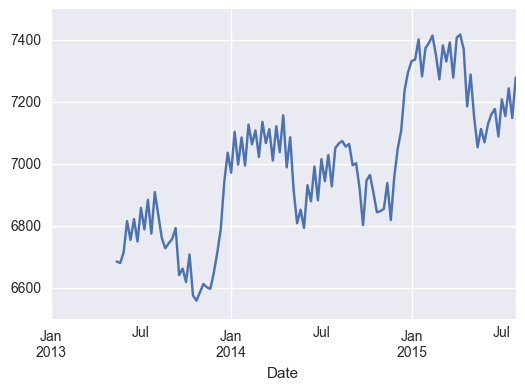

In [49]:
# plot rolling mean

dss.rolling(window = 20).mean().plot()

`rolling` has these important parameters:
    - the first is the series to aggregate
    - `window` is the number of days to include in the average
    - `center` is whether the window should be centered on the date or use data prior to that date
    - `freq` level to roll-up averages to (as in `resample`). `D` for day, `M` for month or `A` for year, etc.

Instead of plotting the full timeseries, we can plot the rolling mean instead, which smooths random changes in sales as well as removing outliers, helping us identify larger trends.

In [50]:
# plot rolling mean
s1d = data2[data2['Store']==1]

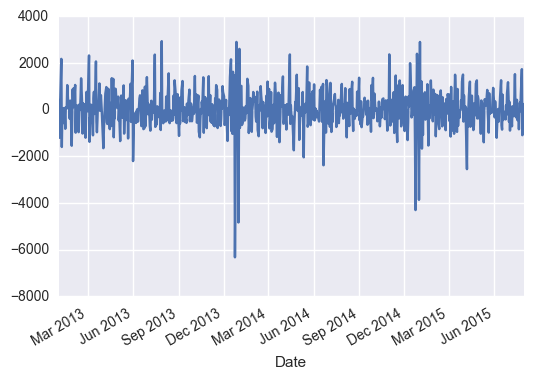

In [54]:
#difference takes the trend out of stuff

s1d.Sales.diff().plot()

## Pandas Window functions
Pandas `rolling` is an example of Pandas window function capabilities. Window functions operate on a set of N consecutive rows (a window) and produce an output: mean, median, min, max, sum, etc.

Another common one is `diff`, which takes the difference over time. `pd.diff` takes one arugment, `periods`, which is how many prior rows to use for the difference.

In addition to `rolling` functions, Pandas provides a similar collection of `expanding` functions, which instead of a window, use all values up until that time.

In [ ]:
# calculate diff for open store 1 data


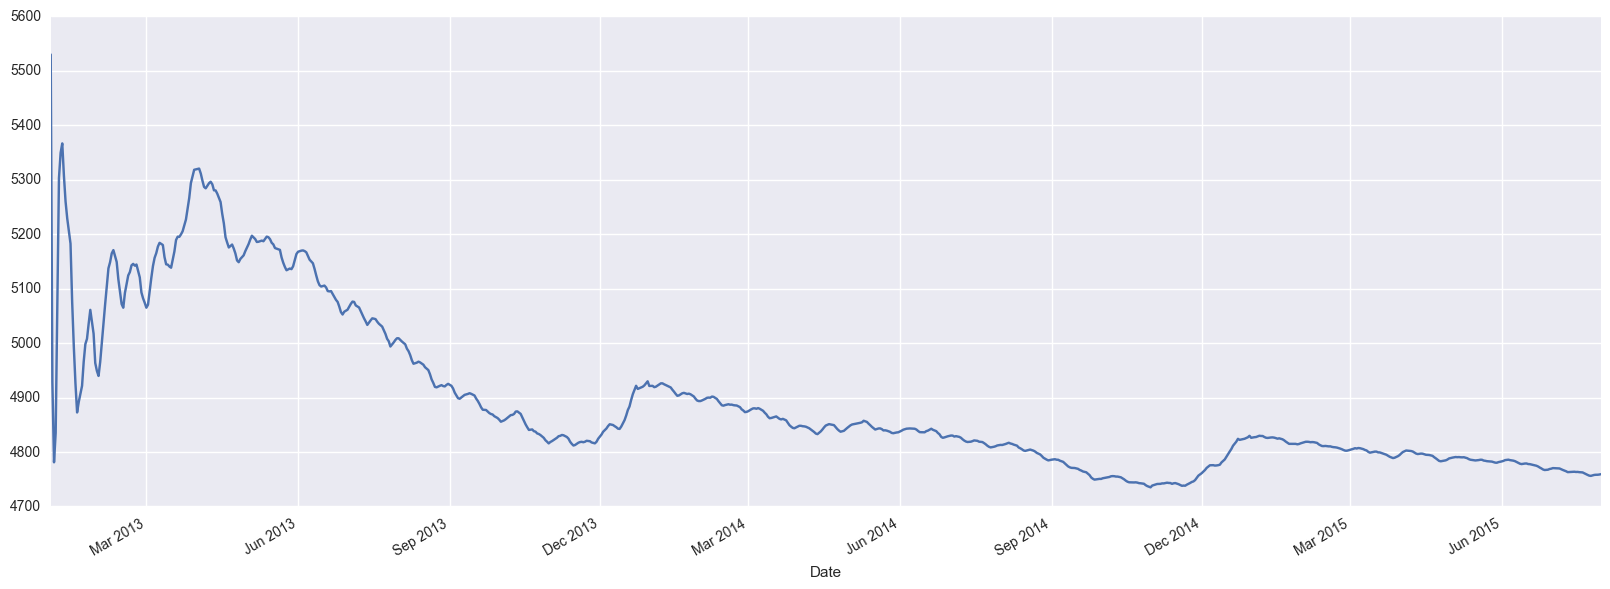

In [58]:
# compute average daily expanding sales
s1d.Sales.expanding().mean().plot(figsize=(20,7))

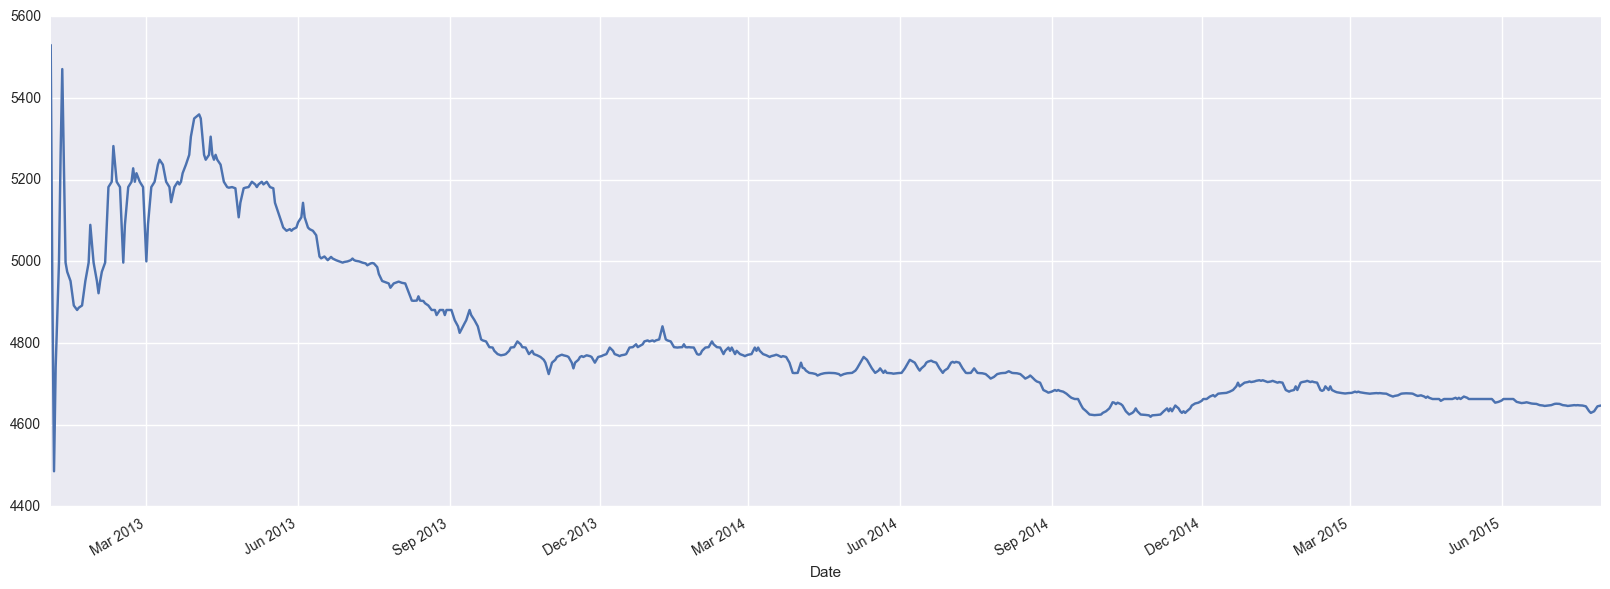

In [59]:
s1d.Sales.expanding().median().plot(figsize=(20,7))

In [ ]:
# does expanding sales at the last row work as assumed?
#last row of the expanding mean should be the mean of everything

## Exercises

In [ ]:
# plot the distribution of sales by month and compare the effect of promotions


In [ ]:
# Are sales more correlated with the prior day, day of week, last month, or last year?


In [ ]:
# plot the 15 day rolling mean of customers in the stores


In [ ]:
# identify the date with largest drop in average sales from previous cycles: daily, weekly, etc.


In [ ]:
# filter out closed days


In [ ]:
# compute the total sales up until Dec. 2014


In [ ]:
# When were the largest differences between 15-day moving/rolling averages?


In [ ]:
# sort values
